In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [48]:
df = pd.read_csv('revenue_prediction.csv')

In [49]:
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [50]:
df.shape

(100, 8)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [52]:
df.duplicated().sum()

0

In [53]:
df.isna().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [54]:
num_col = df.select_dtypes(include=['int','float']).columns.tolist()
obj_col = df.select_dtypes(include='object').columns.tolist()

In [55]:
num_col

['Id', 'No_Of_Item', 'Order_Placed', 'Revenue']

In [56]:
obj_col

['Name', 'Franchise', 'Category', 'City']

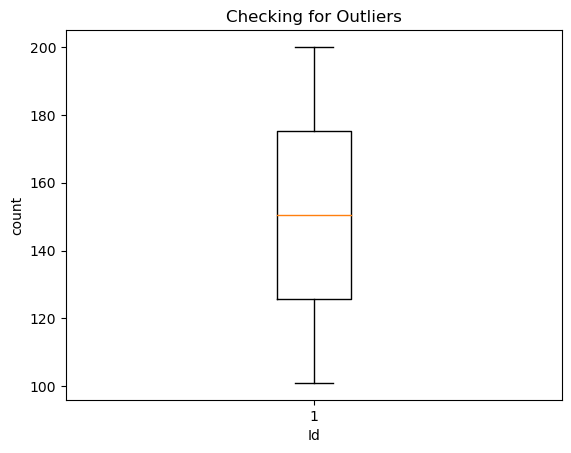

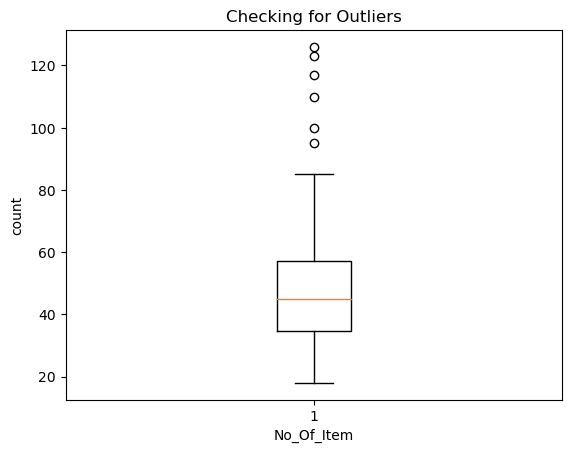

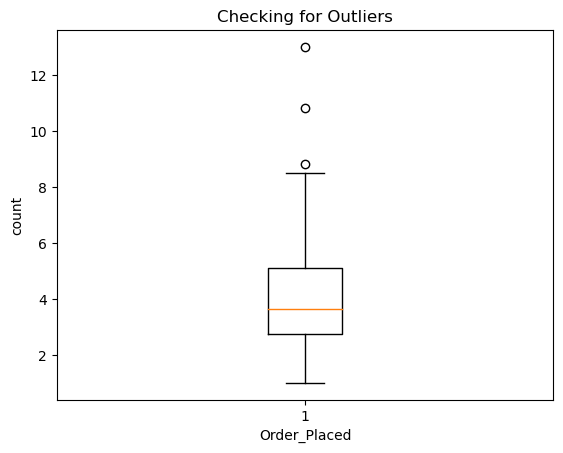

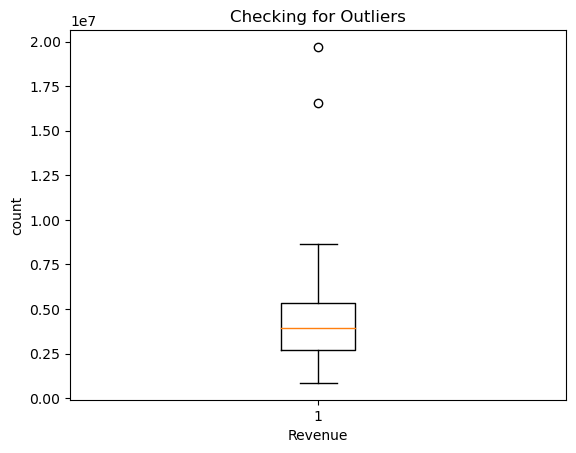

In [57]:
for i in num_col:
    if df[i].dtypes != object:
        plt.boxplot(df[i])
        plt.title('Checking for Outliers')
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

In [58]:
out_col = ['No_Of_Item','Order_Placed','Revenue']

In [59]:
for i in out_col:
    if df[i].dtypes != object:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 -Q1
        
        upper = Q3 + 1.5*IQR
        lower = Q1 - 1.5*IQR
        df = df[(df[i] >= lower) & (df[i] <= upper)]

In [60]:
df.shape

(94, 8)

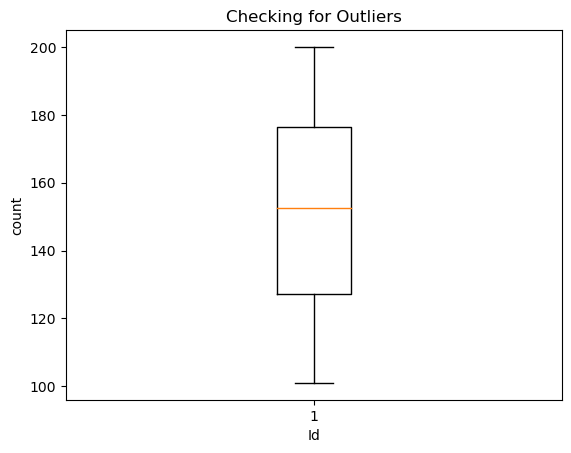

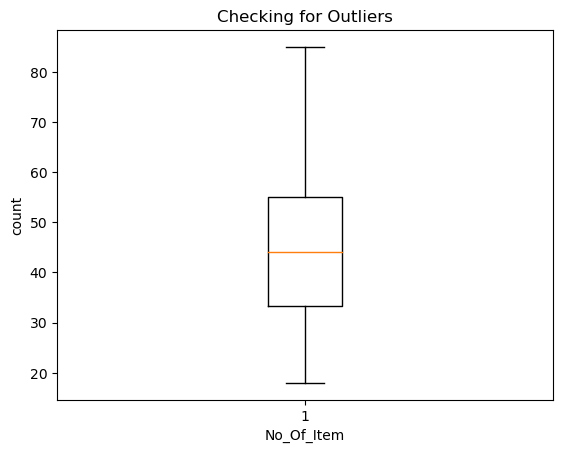

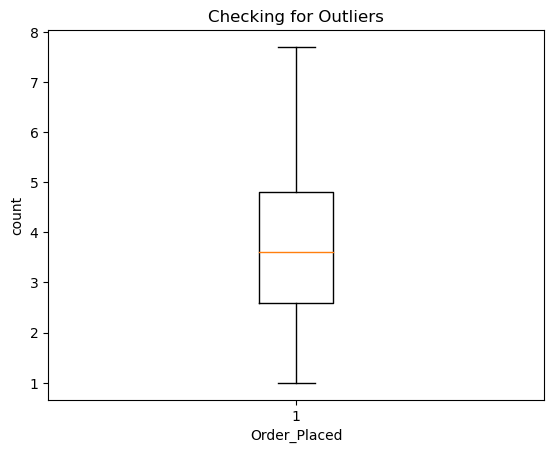

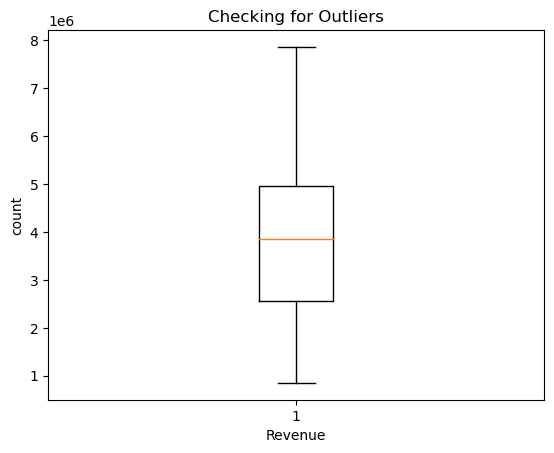

In [61]:
for i in num_col:
    if df[i].dtypes != object:
        plt.boxplot(df[i])
        plt.title('Checking for Outliers')
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

Outliers Removed

In [63]:
df = df.drop(columns=['Id'])

In [70]:
df.head(4)

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,39,1,11,0,55,5.5,5953753
1,14,0,18,1,72,6.8,7223131
2,16,1,4,4,25,1.9,2555379
3,59,1,10,2,18,2.5,2175511


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Name,94.0,4.650000e+01,2.727942e+01,0.0,23.25,46.5,69.75,93.0
Franchise,94.0,5.531915e-01,4.998284e-01,0.0,0.00,1.0,1.00,1.0
Category,94.0,1.071277e+01,5.409316e+00,0.0,7.00,11.0,15.00,18.0
City,94.0,1.563830e+00,1.527937e+00,0.0,0.00,2.0,3.00,4.0
No_Of_Item,94.0,4.507447e+01,1.594024e+01,18.0,33.25,44.0,55.00,85.0
Order_Placed,94.0,3.747872e+00,1.523771e+00,1.0,2.60,3.6,4.80,7.7
Revenue,94.0,3.957660e+06,1.648529e+06,849870.0,2552283.75,3849045.5,4955128.25,7865428.0


In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in obj_col:
    df[i] = le.fit_transform(df[i])

In [67]:
df.head()

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,39,1,11,0,55,5.5,5953753
1,14,0,18,1,72,6.8,7223131
2,16,1,4,4,25,1.9,2555379
3,59,1,10,2,18,2.5,2175511
4,67,1,12,3,48,4.2,4816715


In [86]:
X = df.drop(columns=['Revenue'])
y = df['Revenue']

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR


In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)

In [89]:
from sklearn.metrics import *

In [90]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [83]:
#Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
r2_sco = r2_score(y_test,y_pred)
print('The Accuracy of Linear Regression is: ',r2_sco * 100)


The Accuracy of Linear Regression is:  87.1382115986442


In [94]:
#Decision Tree Regression

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
r2_sco = r2_score(y_test,y_pred)
print('The Accuracy of Decision_Tree Regressor is: ',r2_sco * 100)

The Accuracy of Decision_Tree Regressor is:  75.98034138916218


In [95]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
r2_sco = r2_score(y_test,y_pred)
print('The Accuracy of Random_Forest Regressor is: ',r2_sco * 100)

The Accuracy of Random_Forest Regressor is:  83.03381222569959


In [96]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
r2_sco = r2_score(y_test,y_pred)
print('The Accuracy of XGBRegressor is: ',r2_sco * 100)

The Accuracy of XGBRegressor is:  79.72586054044493


In [97]:
knr = KNeighborsRegressor()
knr.fit(X_train,y_train)
y_pred = knr.predict(X_test)
r2_sco = r2_score(y_test,y_pred)
print('The Accuracy of KNeighborsRegressor is: ',r2_sco * 100)

The Accuracy of KNeighborsRegressor is:  71.97561075653532
